In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Task 1
Write down the differential equation describing the system of chemical equations (assuming a volume of 1)
<br>
- ∅ → X at a rate 1
<br>
- X → Y at rate 2
<br>
- 2 X + Y → 3 X at rate 0.02
<br>
- X → ∅ at rate 0.04

In [2]:
def rxn(Z, t):
    X = Z[0]
    Y = Z[1]
    k1 = 1
    k2 = 2
    k3 = 0.02
    k4 = 0.04
    
    r1 = k1
    r2 = k2 * X
    r3 = k3 * X * X * Y
    r4 = k4 * X
    
    dXdt = r1 - r2 - 2 * r3 + 3 * r3 - r4
    dYdt = r2 - r3
    
    return [dXdt, dYdt]

# Task 2
Use a package to solve the differential equation for 500 time units starting from X(0)=Y(0)=0 (matlab will do this)

In [3]:
from scipy.integrate import odeint

t = np.arange(0, 501) # time steps
X0 = 0
Y0 = 0
Z = (X0, Y0)
conc = odeint(rxn, Z, t)

cX = conc[:, 0]
cY = conc[:, 1]

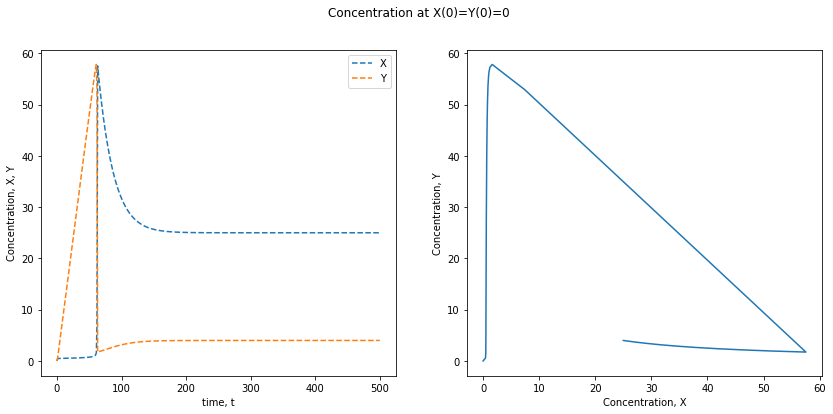

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Concentration at X(0)=Y(0)=0')

ax1.plot(t, cX, '--', label='X')
ax1.plot(t, cY, '--', label='Y')
ax1.legend()
ax1.set(xlabel='time, t', ylabel='Concentration, X, Y')

ax2.plot(cX, cY)
ax2.set(xlabel='Concentration, X', ylabel='Concentration, Y')

plt.show()

# Task 3
Write a Gillespie algorithm to simulate the same four chemical equation and plot the results for 500 time units (note that this is a lot of data to plot and you might want to save and plot the data only after X or Y have changed in number by at least 5.

In [5]:
import gillespy2
from gillespy2.solvers.numpy.ssa_solver import NumPySSASolver

In [12]:
class Gilles(gillespy2.Model):
    def __init__(self, parameter_values=None):
         # First call the gillespy2.Model initializer.
        gillespy2.Model.__init__(self, name='Gilles')

        # Define parameters for the rates of creation and dissociation.
        k1 = gillespy2.Parameter(name='k1', expression=1)
        k2 = gillespy2.Parameter(name='k2', expression=2)
        k3 = gillespy2.Parameter(name='k3', expression=0.02)
        k4 = gillespy2.Parameter(name='k4', expression=0.04)
        self.add_parameter([k1, k2, k3, k4])

        # Define variables for the molecular species representing X and Y.
        X = gillespy2.Species(name='X', initial_value=0)
        Y = gillespy2.Species(name='Y',   initial_value=0)
        self.add_species([X, Y])

        # The list of reactants and products for a Reaction object are each a
        # Python dictionary in which the dictionary keys are Species objects
        # and the values are stoichiometries of the species in the reaction.
        r1 = gillespy2.Reaction(name="r1", rate=k1, reactants={}, products={X:1})
        r2 = gillespy2.Reaction(name="r2", rate=k2, reactants={X:1}, products={Y:1})
        r3 = gillespy2.Reaction(name="r3", reactants={}, products={X:3}, propensity_function="k3 * X * X * Y")
        r4 = gillespy2.Reaction(name="r4", rate=k4, reactants={X:1}, products={})
        self.add_reaction([r1, r2, r3, r4])

        # Set the timespan for the simulation.
        self.timespan(np.linspace(0, 100))

In [ ]:
model = Gilles()
results = model.run(solver=NumPySSASolver())

In [ ]:
results.plot()

In [9]:
class MichaelisMenten(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Michaelis_Menten")
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 0.0017)
            rate2 = gillespy2.Parameter(name='rate2', expression= 0.5)
            rate3 = gillespy2.Parameter(name='rate3', expression = 0.1)
            self.add_parameter([rate1,rate2,rate3])
            
            #Species
            A = gillespy2.Species(name='Substrate', initial_value=301)
            B = gillespy2.Species(name='Enzyme', initial_value=120)
            C = gillespy2.Species(name='Enzyme_Substrate_Complex', initial_value=0)
            D = gillespy2.Species(name='Product', initial_value=0)
            self.add_species([A, B, C, D])
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={A:1,B:1}, products={C:1},
                   rate=rate1)
            
            r2 = gillespy2.Reaction(name="r2",reactants={C:1}, products={A:1,B:1},
                    rate=rate2)
            
            r3 = gillespy2.Reaction(name="r3",reactants={C:1}, products={B:1,D:1},
                    rate=rate3)
            self.add_reaction([r1,r2,r3])
            self.timespan(np.linspace(0,100,101))
            

In [10]:
model = MichaelisMenten()

2020-06-01 07:15:20,855 - root - WARNING - Unable to use C++ optimized SSA: argument 'solver=<class 'gillespy2.solvers.cpp.ssa_c_solver.SSACSolver'>' to run() failed.  Reason Given: [WinError 2] The system cannot find the file specified.  The performance of this package can be significantly increased if you install/configure GCC on this machine.


Wall time: 91.3 ms


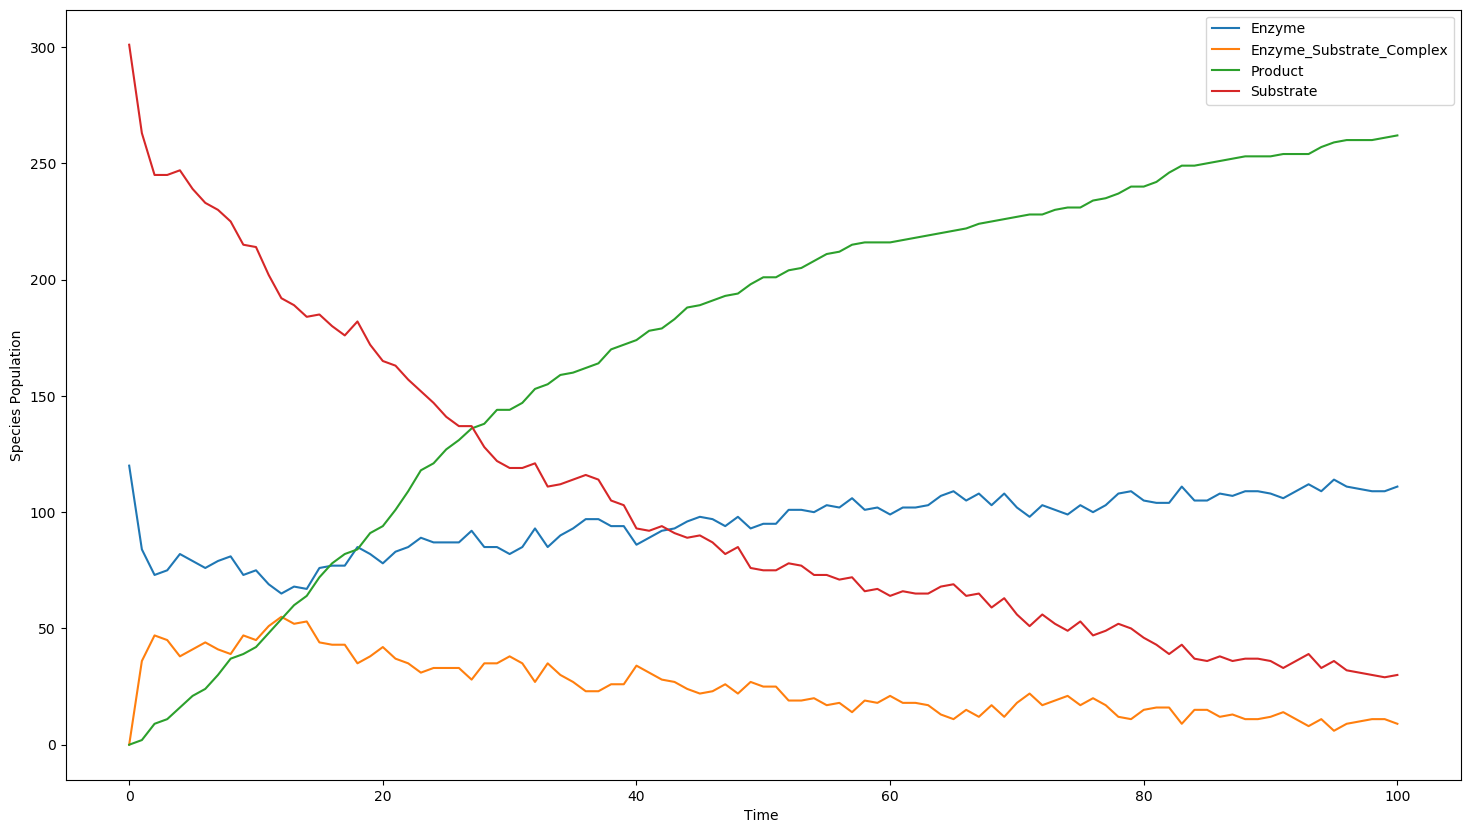

In [11]:
%time results = model.run()
results.plot()